In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sn

In [7]:
data = pd.read_csv("/content/heart-disease.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

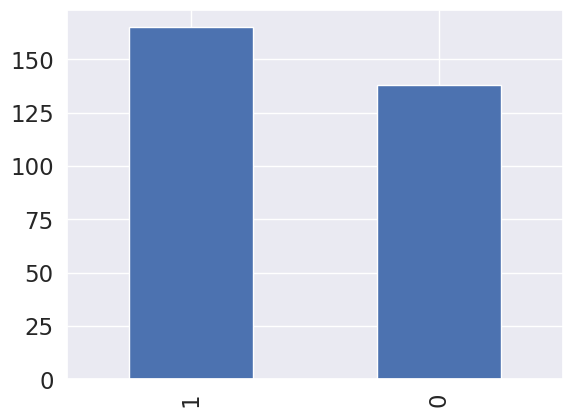

In [12]:
data["target"].value_counts().plot.bar()

<Axes: >

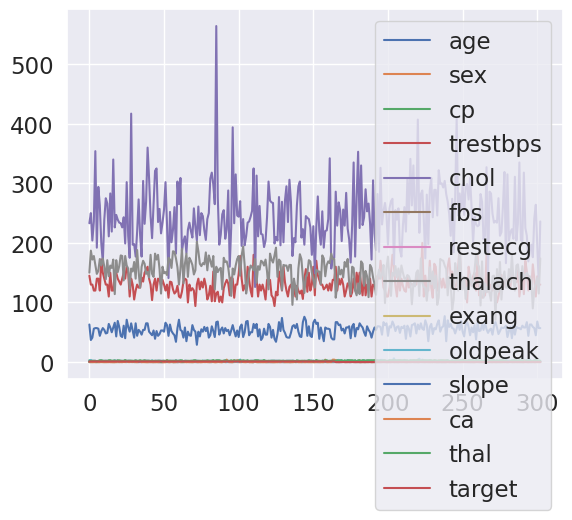

In [13]:
data.plot()

In [14]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


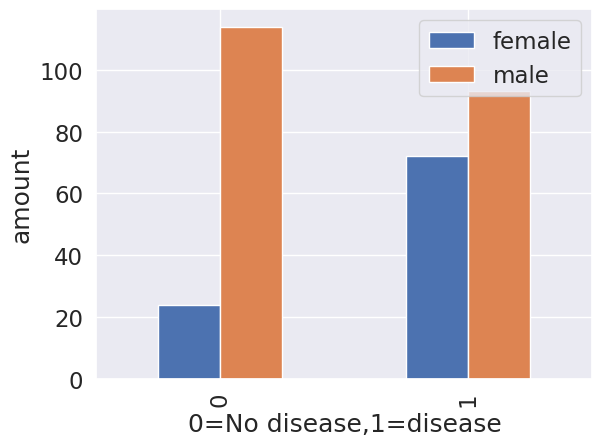

In [15]:
pd.crosstab(data.target,data.sex).plot.bar()
plt.xlabel("0=No disease,1=disease")
plt.ylabel("amount")
plt.legend(["female","male"]);

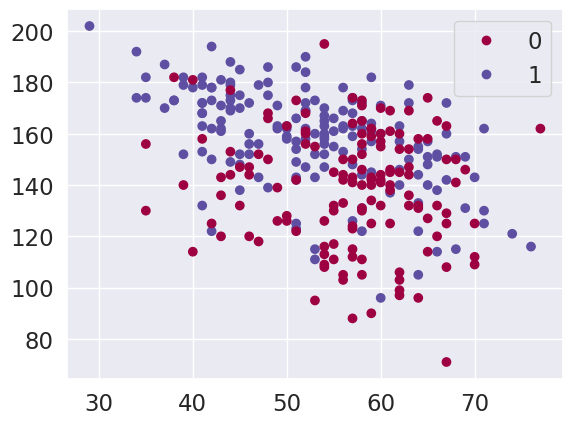

In [16]:
scatter = plt.scatter(x=data["age"],y=data["thalach"],c=data["target"],cmap="Spectral")
plt.legend(*scatter.legend_elements())

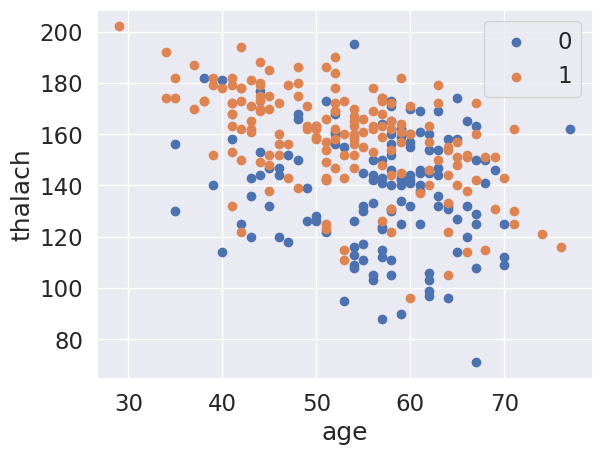

In [17]:
plt.scatter(x=data["age"][data["target"]==0],y=data["thalach"][data["target"]==0])
plt.scatter(x=data["age"][data["target"]==1],y=data["thalach"][data["target"]==1])
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["0","1"])

<Axes: ylabel='Frequency'>

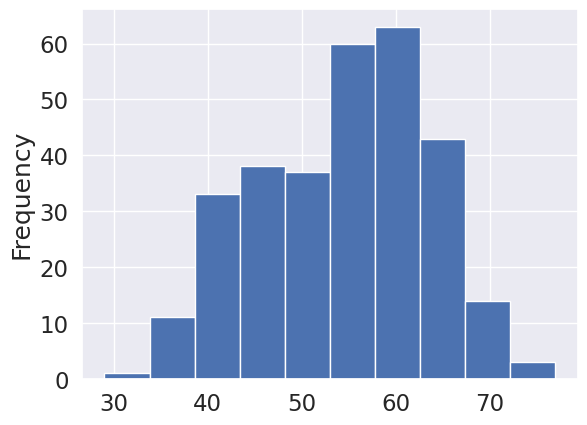

In [18]:
data["age"].plot.hist()

In [19]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

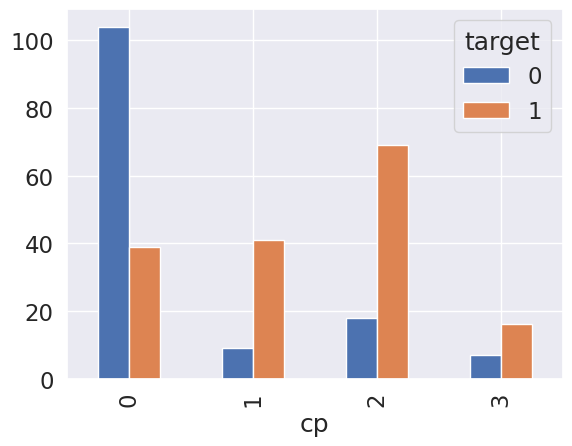

In [20]:
pd.crosstab(data.cp,data.target).plot.bar()

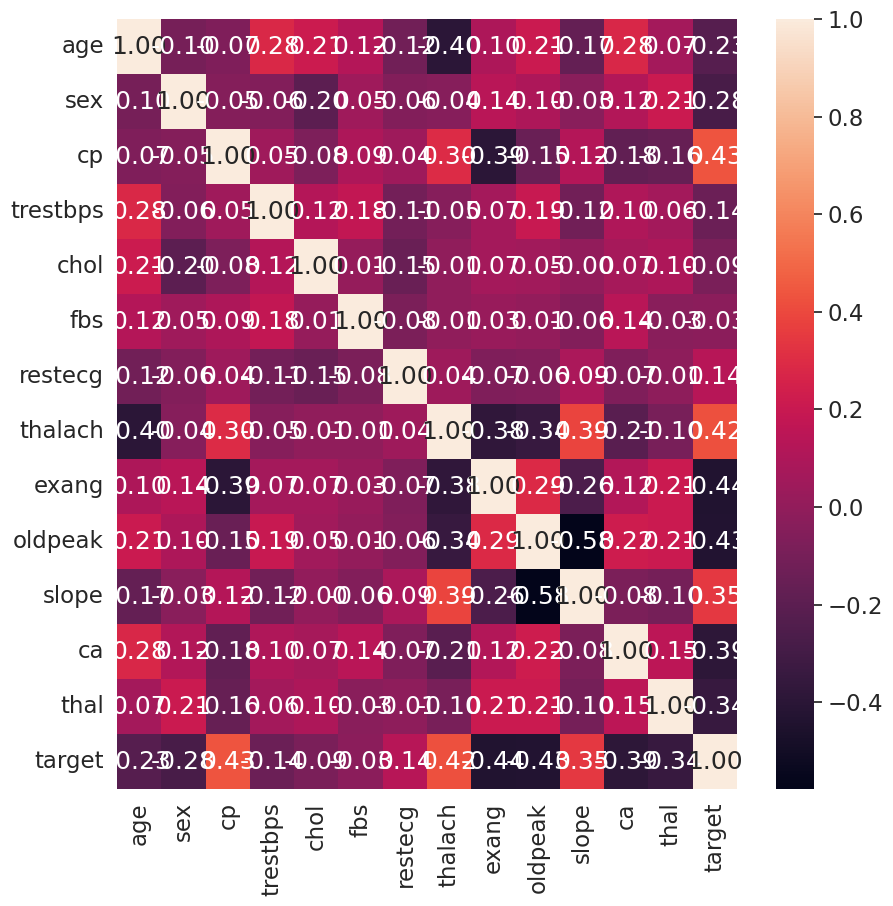

In [21]:
fig,ax=plt.subplots(figsize=(10,10))
ax=sn.heatmap(data.corr(),annot=True,fmt="0.2f")

In [22]:
x= data.drop("target",axis=1)
y=data["target"]

In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y ,len(y)


(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303)

In [25]:
from sklearn.model_selection import train_test_split ,RandomizedSearchCV ,GridSearchCV

In [26]:
x_train ,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape, x_test.shape,y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [29]:
models={"RandomForesrClassifier":RandomForestClassifier(),
        "SVC":SVC(),
        "LogisticRegression":LogisticRegression(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "KNeighborsClassifier":KNeighborsClassifier()}

In [27]:
results={}

In [26]:
for model in models.items():
    np.random.seed(42)
    model[1].fit(x_train,y_train)
    results[model[0]]=model[1].score(x_test,y_test)
results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForesrClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'GradientBoostingClassifier': 0.7704918032786885,
 'KNeighborsClassifier': 0.6885245901639344}

In [27]:
result_pd=pd.DataFrame(data=results.values(),index=results.keys(),columns=["results"])
result_pd

,results
RandomForesrClassifier,0.836066
SVC,0.704918
LogisticRegression,0.885246
GradientBoostingClassifier,0.770492
KNeighborsClassifier,0.688525


Text(0.5, 0, 'models')

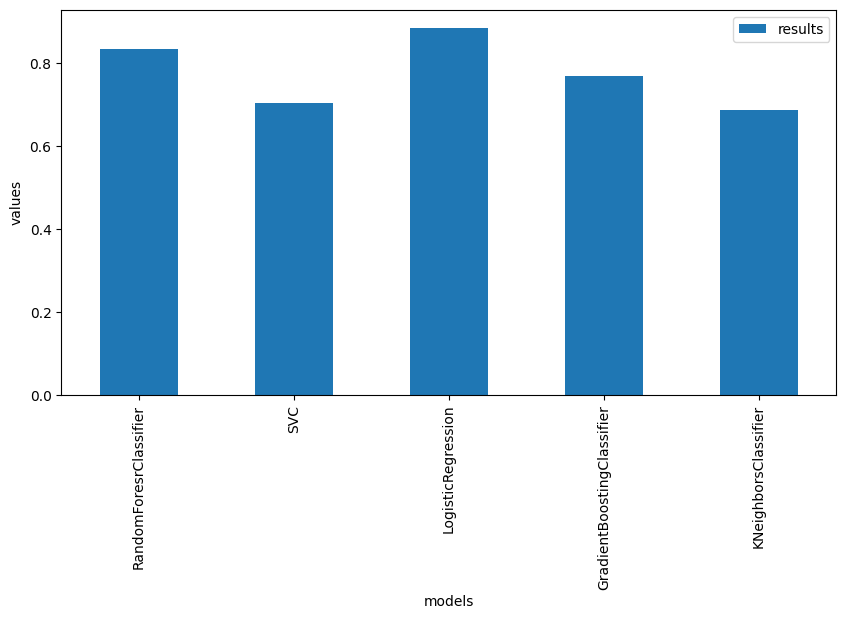

In [28]:

result_pd.plot.bar(figsize=(10,5))
plt.ylabel("values")
plt.xlabel("models")

In [30]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [30]:
X_train

array([[0.27083333, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.35416667, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.35416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667]])

In [31]:
for model in models.items():
    np.random.seed(42)
    model[1].fit(X_train,y_train)
    results[model[0]]=model[1].score(X_test,y_test)
results

{'RandomForesrClassifier': 0.8360655737704918,
 'SVC': 0.8360655737704918,
 'LogisticRegression': 0.8524590163934426,
 'GradientBoostingClassifier': 0.7868852459016393,
 'KNeighborsClassifier': 0.8360655737704918}

In [46]:
np.random.seed(42)
param_test3 = {'min_samples_split':range(2,100,5),
               'min_samples_leaf':range(1,50,5),
               'n_estimators': np.arange(1, 1000, 50),
               "max_depth":  np.arange(1, 20, 1),

               'max_features':['sqrt','log2']}
gsearch3 = RandomizedSearchCV(GradientBoostingClassifier(),
                              param_test3,
                              n_iter=200,
                              cv=5,
                              verbose=True)
gsearch3.fit(x_train,y_train)
gsearch3.score(x_test,y_test), gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


(0.8524590163934426,
 {'n_estimators': 151,
  'min_samples_split': 2,
  'min_samples_leaf': 36,
  'max_features': 'sqrt',
  'max_depth': 9},
 0.8430272108843537)

In [47]:
np.random.seed(42)
rf_random={'min_samples_split':range(2,100,5),
           'min_samples_leaf':range(1,50,5),
           'n_estimators': np.arange(1, 1000, 50),
           "max_depth":  np.arange(1, 20, 1)}
rf_search = RandomizedSearchCV(RandomForestClassifier(),
                               rf_random,
                               n_iter=200,
                               cv=5,
                               verbose=True)
rf_search.fit(x_train,y_train)
rf_search.score(x_test,y_test), rf_search.best_params_, rf_search.best_score_
#0.8688524590163934

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


(0.8688524590163934,
 {'n_estimators': 951,
  'min_samples_split': 87,
  'min_samples_leaf': 11,
  'max_depth': 5},
 0.8470238095238095)

In [33]:
sv_search={'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced']  }
sv_search_model=GridSearchCV(SVC(random_state=42,probability=True),
                                   sv_search,

                                   cv=5,
                                   verbose=1,n_jobs=-1)
sv_search_model.fit(X_train , y_train)
sv_search_model.score(X_test,y_test),sv_search_model.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


(0.8524590163934426,
 {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'})

In [39]:
param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]
}
KNN_search=grid = GridSearchCV(KNeighborsClassifier(), param_grid,
                               cv=5,
                               verbose=1
                               )
KNN_search.fit(X_train,y_train)
KNN_search.score(X_test,y_test), KNN_search.best_params_, KNN_search.best_score_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


(0.8360655737704918,
 {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 0.8304421768707483)

In [64]:
grid={'C' : np.logspace(-4, 4, 30),
    'solver' : ['liblinear','newton-cg','newton-cholesky']}

In [65]:
lo_grid=GridSearchCV(LogisticRegression(),
                    grid,

                    cv=5,
                    verbose=True)

lo_grid.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'newton-cg',
                                    'newton-cholesky']},
             verbose=True)

In [67]:
lo_grid.best_params_,lo_grid.score(x_test,y_test)

({'C': 0.20433597178569418, 'solver': 'liblinear'}, 0.8852459016393442)

In [30]:
final_model =LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.8852459016393442

In [31]:
y_preds=final_model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay

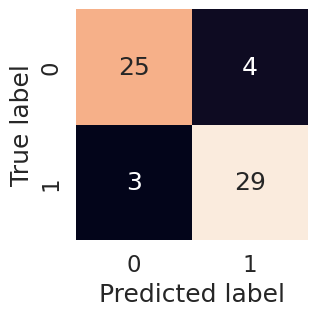

In [33]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

In [34]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [35]:
precision_score(y_test,y_preds)

0.8787878787878788

In [36]:
recall_score(y_test,y_preds)

0.90625

In [37]:
f1_score(y_test,y_preds)

0.8923076923076922

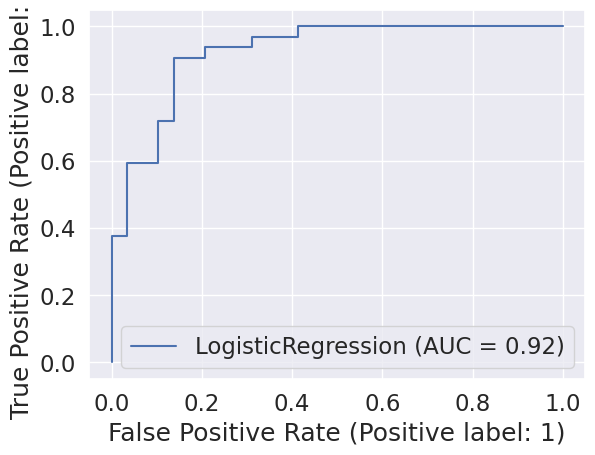

In [38]:
RocCurveDisplay.from_estimator(final_model,x_test,y_test)

In [105]:
from pickle import dump
dump(lo_grid,open('heart_disease_model.pkl','wb'))

In [39]:
feature_dict=dict(zip(data.columns,list(final_model.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'feature importance'}>

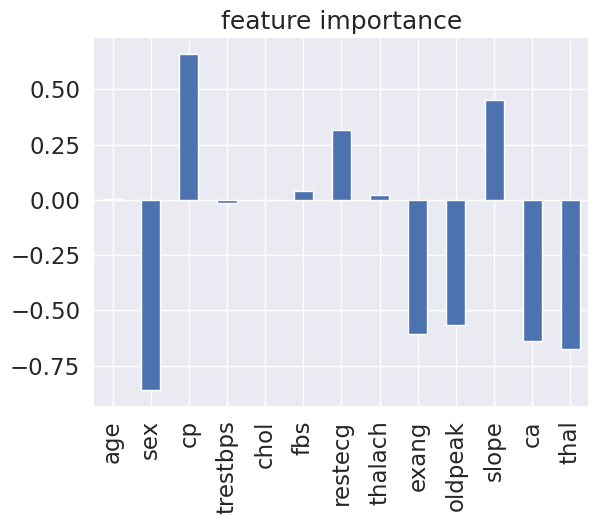

In [42]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)